### Import Necessary Libraries

In [1]:
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn import tree
import pickle
from sklearn.model_selection import RandomizedSearchCV

### Load Data

In [ ]:
all = np.concat([data_2016, data_2017]) 
train = all[:int(0.49)*len(all)] 
test = all[int(0.49)*len(all):] 

In [2]:
train_2016 = pd.read_csv("train_2016.csv")
train_2017 = pd.read_csv("train_2017.csv")

In [3]:
properties_2016 = pd.read_csv("properties_2016.csv")
properties_2017 = pd.read_csv("properties_2017.csv")

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/3515179615.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016 = pd.read_csv("properties_2016.csv")
/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/3515179615.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2017 = pd.read_csv("properties_2017.csv")


In [4]:
train_2016 = pd.merge(train_2016, properties_2016, how = 'left', on = 'parcelid')
train_2017 = pd.merge(train_2017, properties_2017, how = 'left', on = 'parcelid')

In [5]:
df = pd.concat([train_2016, train_2017], ignore_index=True)
df

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.027600,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.168400,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.004000,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.021800,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.005000,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13


### Data Exploration

Check the data type for each column.

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  int64  
 1   logerror                      167888 non-null  float64
 2   transactiondate               167888 non-null  object 
 3   airconditioningtypeid         53788 non-null   float64
 4   architecturalstyletypeid      468 non-null     float64
 5   basementsqft                  93 non-null      float64
 6   bathroomcnt                   167854 non-null  float64
 7   bedroomcnt                    167854 non-null  float64
 8   buildingclasstypeid           31 non-null      float64
 9   buildingqualitytypeid         107173 non-null  float64
 10  calculatedbathnbr             166056 non-null  float64
 11  decktypeid                    1272 non-null    float64
 12  finishedfloor1squarefeet      12893 non-null

Check the number of missing values for each column.

In [6]:
percent_missing = df.isnull().sum() / len(df)
missing_value_df = pd.DataFrame({'total_missing': df.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,total_missing,percent_missing
buildingclasstypeid,167857,0.999815
finishedsquarefeet13,167813,0.999553
storytypeid,167795,0.999446
basementsqft,167795,0.999446
yardbuildingsqft26,167723,0.999017
fireplaceflag,167494,0.997653
architecturalstyletypeid,167420,0.997212
typeconstructiontypeid,167366,0.996891
finishedsquarefeet6,167081,0.995193
decktypeid,166616,0.992424


Check the distribution of logerror (label).

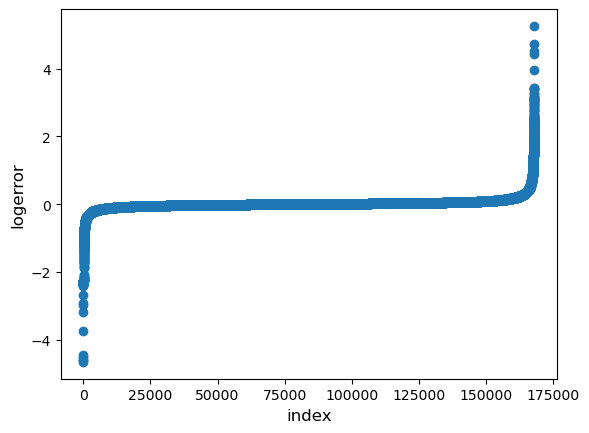

In [338]:
plt.scatter(range(df.shape[0]), np.sort(df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Explore the relation between longtitude/latitude variables and logerror.

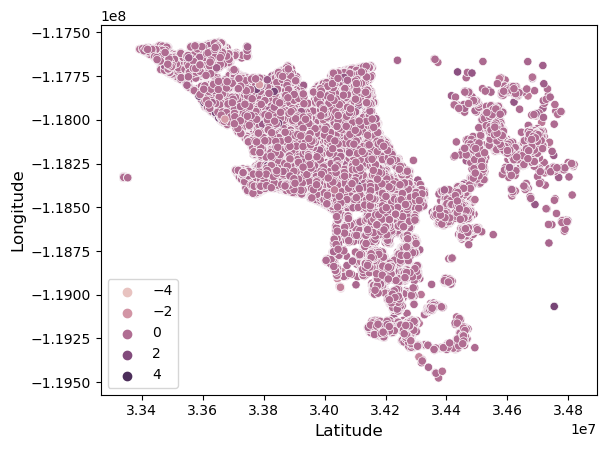

In [339]:
sns.scatterplot(x=df.latitude.values, y=df.longitude.values, hue=df.logerror.values)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Drop columns with too many missing values.

In [7]:
df.drop(percent_missing[percent_missing > 0.8].index, axis=1, inplace=True)

Drop columns with similar meanings.

In [8]:
df.drop(['regionidneighborhood', 'propertyzoningdesc', 'regionidcity', 'regionidzip', 'regionidcounty', 'fips',
        'propertycountylandusecode'], axis=1, inplace=True)

From the previous table missing_value_df, several columns surprisingly all miss 34 values. Let's check if the missing values are all in the same row.

In [342]:
df[df['latitude'].isnull()]

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
90663,10813418,-0.008083,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91358,12133448,-1.062436,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93851,11905748,0.084014,2017-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94001,12961343,0.559867,2017-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94057,12006414,-0.795601,2017-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95188,12039176,0.175751,2017-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99163,11905738,-0.050252,2017-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99598,12185469,-0.447673,2017-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100742,11905737,-0.029747,2017-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101702,10855501,0.018408,2017-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above result shows these rows almost miss all feature values. Drop these rows as including them for training or prediction can be meaningless.

In [9]:
df.drop(df[df['latitude'].isnull()].index, inplace=True)

Convert data types and extract time data.

In [10]:
df = df.astype({'parcelid':'str', 'airconditioningtypeid': 'category', 
                'heatingorsystemtypeid':'category', 'buildingqualitytypeid': 'category', 
                'propertylandusetypeid': 'category'})

In [11]:
df['transactiondate'] = pd.to_datetime(df['transactiondate'], format='%Y-%m-%d')
df['yearbuilt'] = pd.to_datetime(df['transactiondate'], format='%Y')
df['assessmentyear'] = pd.to_datetime(df['assessmentyear'], format='%Y')

In [12]:
df['transactionyear'] = df['transactiondate'].dt.year
df['transactionmonth'] = df['transactiondate'].dt.month
df['yearbuilt'] = df['yearbuilt'].dt.year
df['assessmentyear'] = df['assessmentyear'].dt.year

In [13]:
df.drop('transactiondate', axis=1, inplace=True)

Check the correlations between columns and logerror.

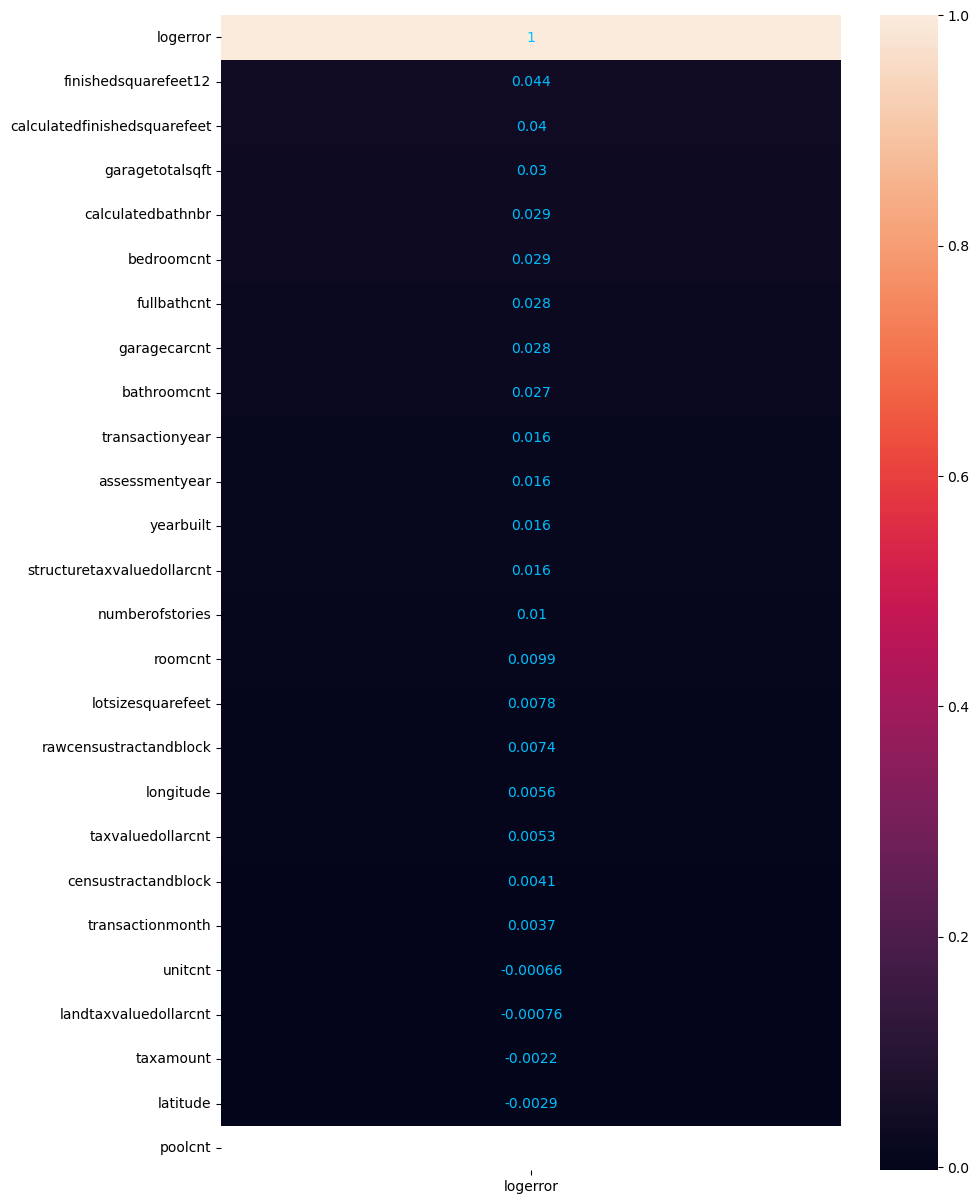

In [14]:
logerror_corr = df.loc[:,df.columns != 'parcelid'].corr()[['logerror']]
logerror_corr = logerror_corr.sort_values(by='logerror', ascending=False)
fig, ax = plt.subplots(figsize=(10, 15))
ax = sns.heatmap(logerror_corr, annot=True, annot_kws={'color': 'deepskyblue'})

Check correlations between columns.

In [15]:
corr = df.loc[:, ~df.columns.isin(['parcelid', 'logerror'])].corr()

<AxesSubplot: >

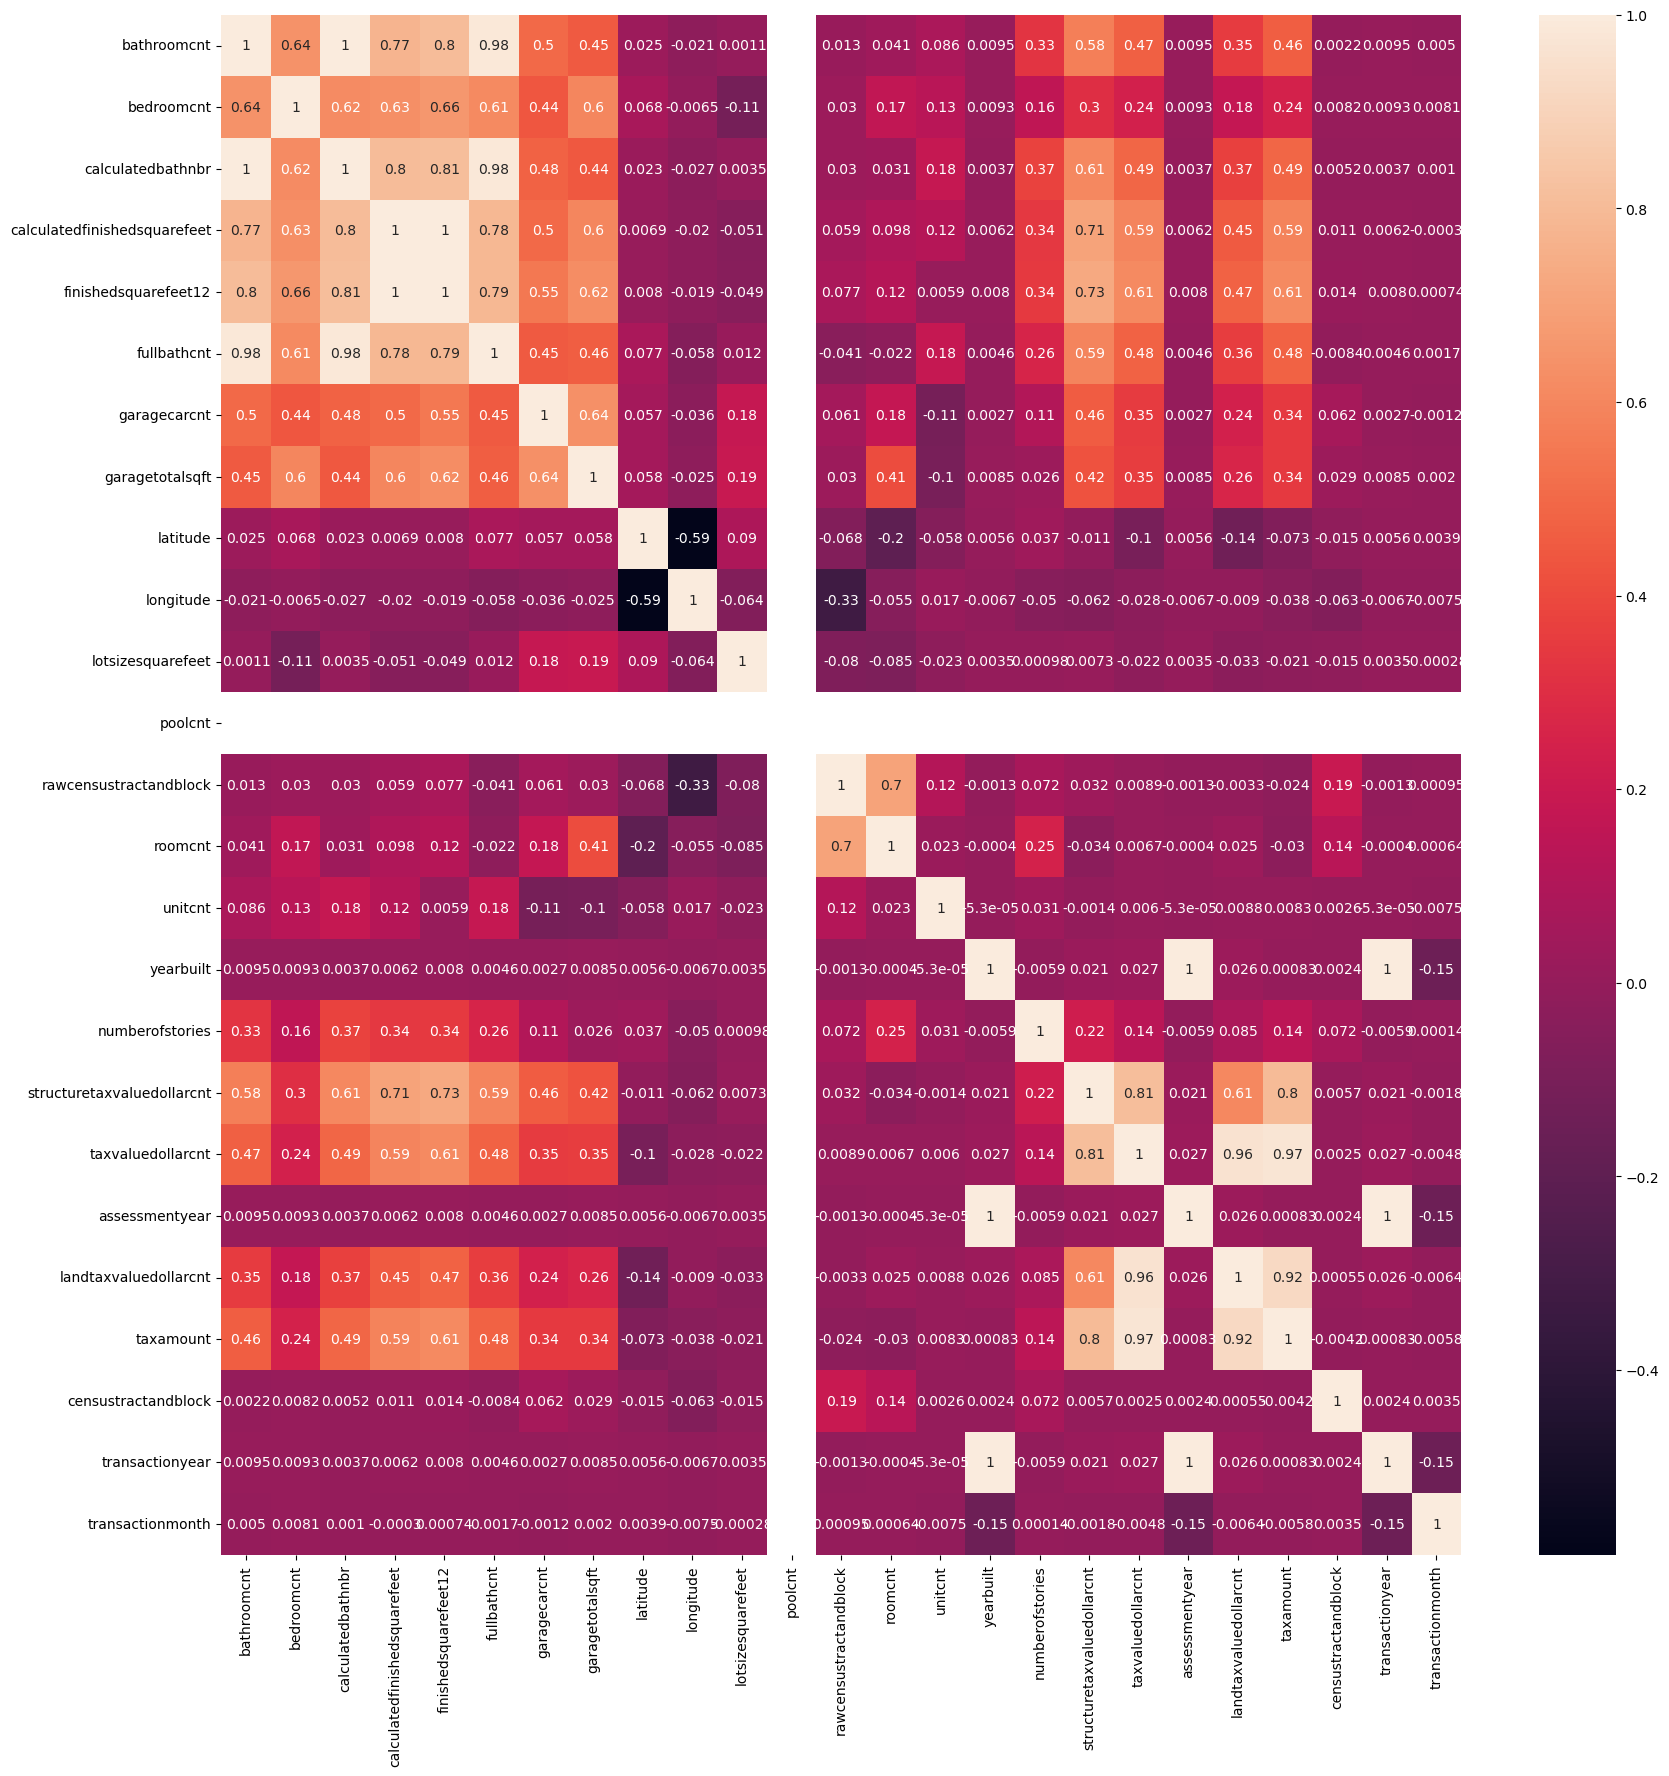

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, ax=ax)

Drop columns which are highly correlated.

In [17]:
df.drop(['landtaxvaluedollarcnt', 'taxamount', 'fullbathcnt', 'calculatedbathnbr', 'finishedsquarefeet12', 
         'structuretaxvaluedollarcnt', 'censustractandblock'], axis=1, inplace=True)

### Split data into training and testing sets.

In [35]:
train = df[:int(0.49*len(df))] 
test = df[int(0.49*len(df)):] 

In [36]:
X_train = train.loc[:, ~train.columns.isin(['parcelid', 'logerror'])]
X_test = test.loc[:, ~test.columns.isin(['parcelid', 'logerror'])]

In [37]:
Y_train = train['logerror']
Y_test = test['logerror']

### Data Preprocessing

Check the distribution of each column.

/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


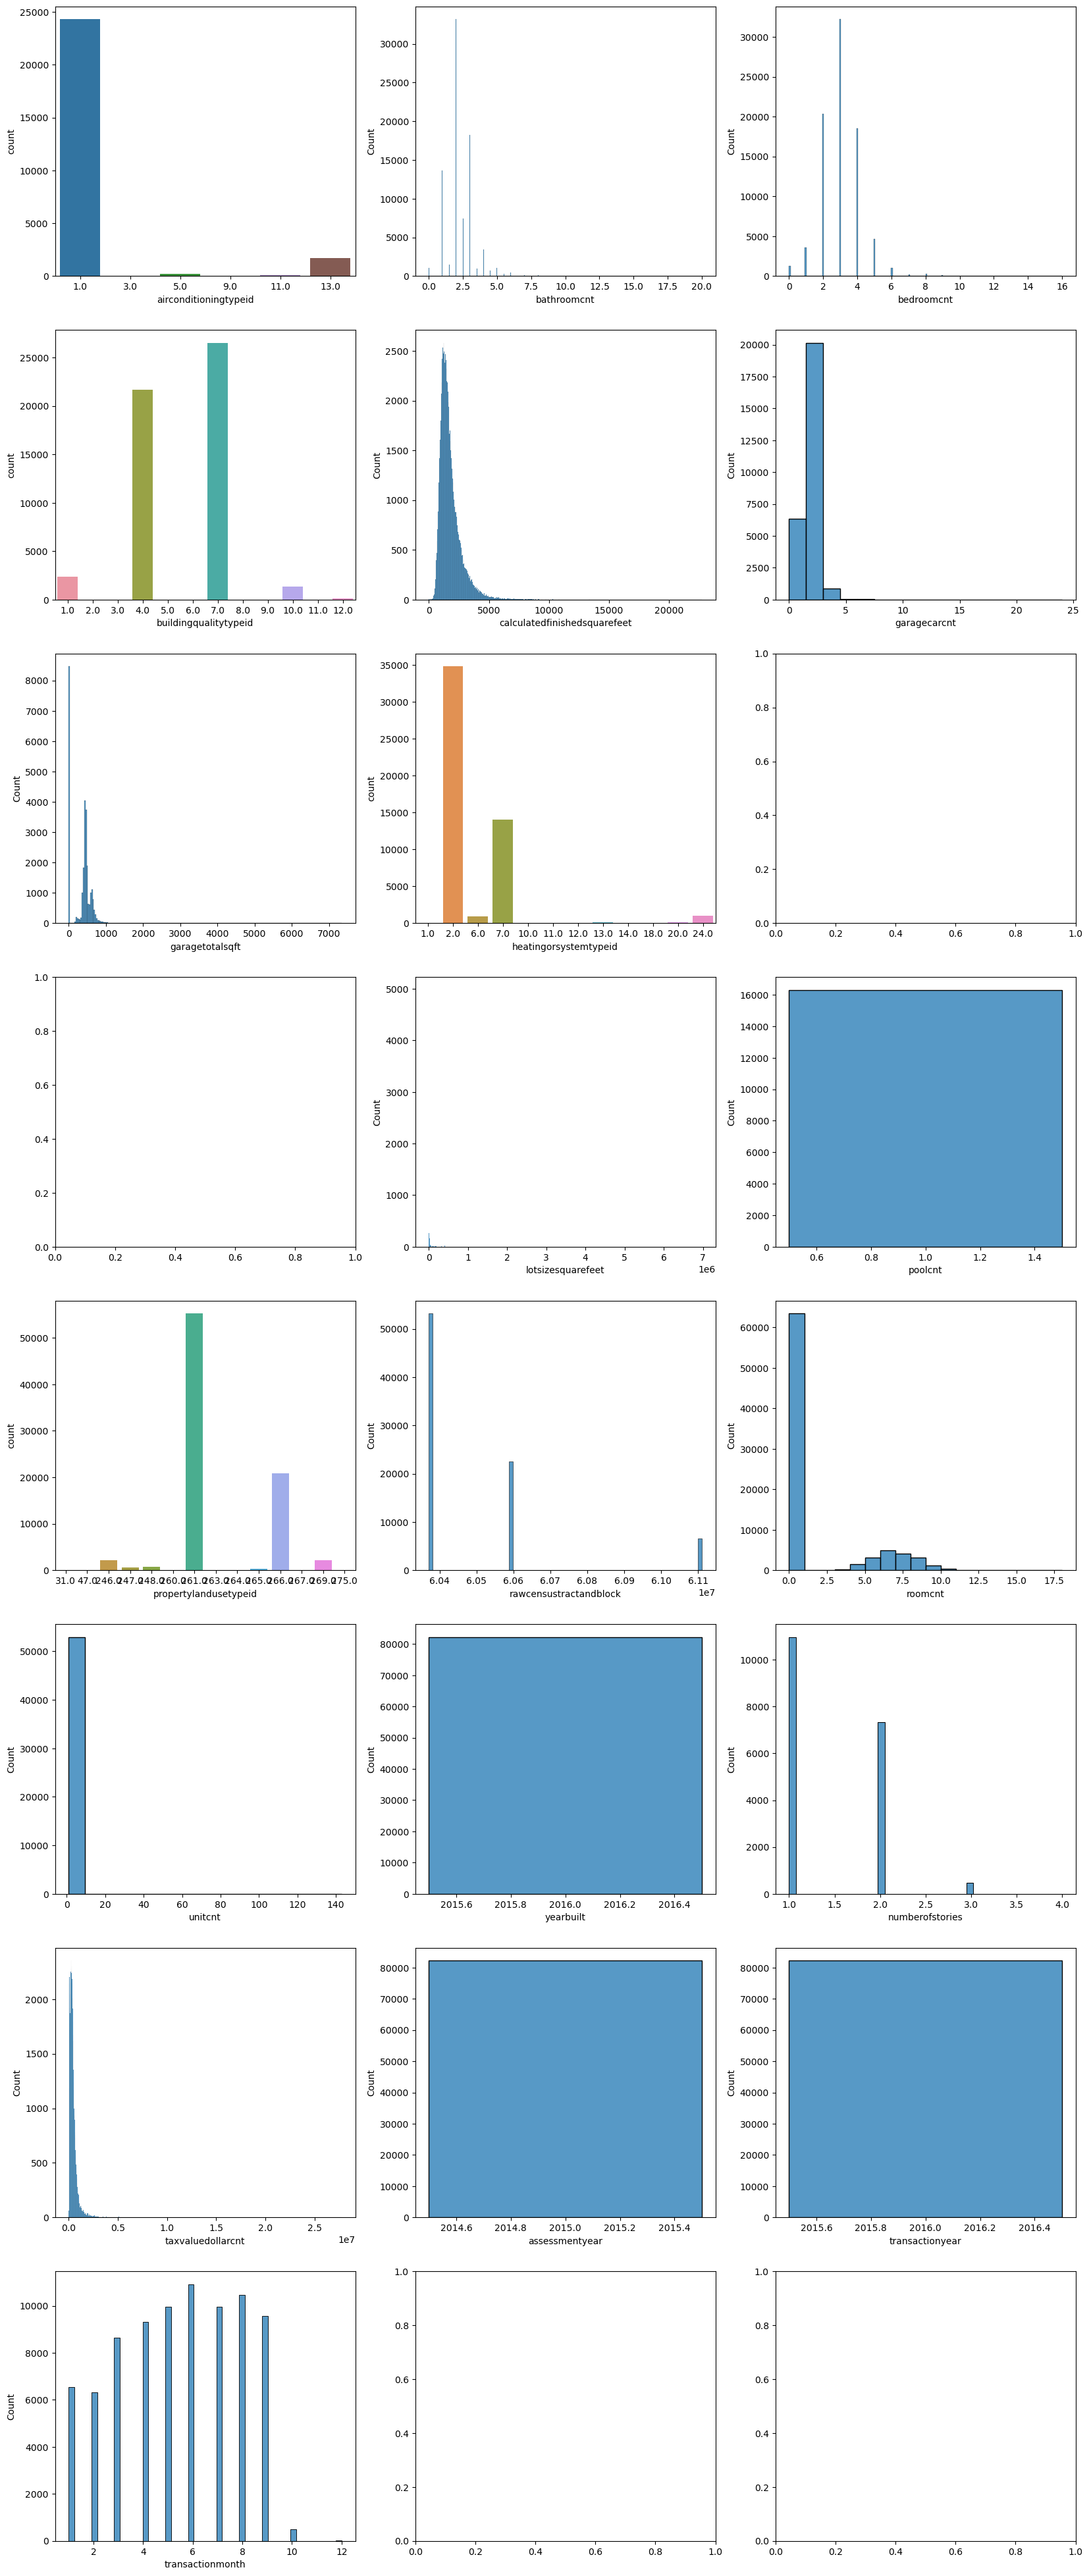

In [39]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 50))  # Make five rows of three plots.
for i, column in enumerate(X_train.columns):
    if column not in ['latitude', 'longitude']:
        if X_train[column].dtypes == 'category':
            sns.countplot(data=X_train, x=column, ax=axes[i // 3, i % 3])
        else:
            sns.histplot(data=X_train, x=column, ax=axes[i // 3, i % 3]) 

#### Standardize

Standardize the numeric fields. Fit using training set and transform both training and testing sets.

In [40]:
sc = StandardScaler()

In [41]:
numeric_X = X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',
        'lotsizesquarefeet', 'poolcnt', 'roomcnt', 'unitcnt', 'numberofstories', 'taxvaluedollarcnt']]

In [42]:
numeric_X = sc.fit_transform(numeric_X)
X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',
        'lotsizesquarefeet', 'poolcnt', 'roomcnt', 'unitcnt', 'numberofstories', 'taxvaluedollarcnt']] = numeric_X
X_train

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/2875628761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',


,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,...,propertylandusetypeid,rawcensustractandblock,roomcnt,unitcnt,yearbuilt,numberofstories,taxvaluedollarcnt,assessmentyear,transactionyear,transactionmonth
0,1.0,-0.280345,-0.028225,4.0,-0.098744,NaN,NaN,2.0,34280990.0,-118488536.0,...,261.0,6.037107e+07,-0.52544,-0.133818,2016,NaN,-0.179581,2015,2016,1
1,NaN,1.212329,0.834776,NaN,0.525393,0.304822,0.457615,NaN,33668120.0,-117677556.0,...,261.0,6.059052e+07,-0.52544,NaN,2016,NaN,0.227582,2015,2016,1
2,1.0,0.714771,-0.891226,4.0,0.475807,NaN,NaN,2.0,34136312.0,-118175032.0,...,261.0,6.037464e+07,-0.52544,-0.133818,2016,NaN,-0.613674,2015,2016,1
3,1.0,-0.280345,-0.891226,4.0,-1.009617,NaN,NaN,2.0,33755800.0,-118309000.0,...,266.0,6.037296e+07,-0.52544,-0.133818,2016,NaN,-0.387879,2015,2016,1
4,NaN,0.217213,0.834776,NaN,0.546952,0.304822,0.942528,NaN,33485643.0,-117700234.0,...,261.0,6.059042e+07,2.30703,NaN,2016,1.025709,-0.045195,2015,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,NaN,-1.275462,-0.891226,7.0,-0.396260,NaN,NaN,7.0,34158885.0,-118124984.0,...,261.0,6.037462e+07,-0.52544,-0.133818,2016,NaN,-0.203537,2015,2016,10
82244,NaN,0.217213,0.834776,NaN,1.007240,0.304822,1.061891,NaN,33770226.0,-117769023.0,...,261.0,6.059076e+07,2.30703,NaN,2016,-0.808943,-0.556129,2015,2016,10
82245,NaN,0.217213,-0.028225,NaN,0.880041,0.304822,0.584438,NaN,34260595.0,-119265988.0,...,261.0,6.111003e+07,2.30703,NaN,2016,1.025709,0.928319,2015,2016,10
82246,NaN,-1.275462,-0.891226,7.0,-1.219819,NaN,NaN,7.0,34023263.0,-118411889.0,...,261.0,6.037272e+07,-0.52544,-0.133818,2016,NaN,-0.384871,2015,2016,10


In [43]:
numeric_X_test = X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',
        'lotsizesquarefeet', 'poolcnt', 'roomcnt', 'unitcnt', 'numberofstories', 'taxvaluedollarcnt']]
numeric_X_test = sc.transform(numeric_X_test)
X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',
        'lotsizesquarefeet', 'poolcnt', 'roomcnt', 'unitcnt', 'numberofstories', 'taxvaluedollarcnt']] = numeric_X_test
X_test

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/3460683907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',


,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,...,propertylandusetypeid,rawcensustractandblock,roomcnt,unitcnt,yearbuilt,numberofstories,taxvaluedollarcnt,assessmentyear,transactionyear,transactionmonth
82248,1.0,-1.275462,-0.028225,7.0,-0.969733,NaN,NaN,2.0,33864990.0,-118169398.0,...,261.0,6.037571e+07,-0.525440,-0.133818,2016,NaN,-0.321771,2015,2016,10
82249,NaN,0.217213,-0.028225,NaN,-0.269061,0.304822,0.465075,NaN,34261927.0,-118737326.0,...,261.0,6.111008e+07,1.952971,NaN,2016,1.025709,-0.030867,2015,2016,10
82250,NaN,-0.280345,-0.028225,7.0,0.186915,NaN,NaN,NaN,33985154.0,-118031375.0,...,246.0,6.037502e+07,-0.525440,1.080238,2016,NaN,0.156164,2015,2016,10
82251,NaN,-1.275462,-0.028225,7.0,-0.772467,NaN,NaN,7.0,34170021.0,-118453327.0,...,261.0,6.037129e+07,-0.525440,-0.133818,2016,NaN,-0.704361,2015,2016,10
82252,NaN,-0.280345,-0.028225,NaN,-0.045924,-1.331024,0.189047,NaN,33791384.0,-117972164.0,...,261.0,6.059088e+07,1.952971,NaN,2016,-0.808943,-0.700030,2015,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,1.0,0.714771,-0.028225,8.0,-0.037300,NaN,NaN,2.0,34202400.0,-118502000.0,...,266.0,6.037132e+07,-0.525440,-0.133818,2017,NaN,-0.145560,2016,2017,9
167884,NaN,-0.280345,-0.891226,6.0,-0.527771,NaN,NaN,2.0,34245368.0,-118282383.0,...,261.0,6.037101e+07,-0.525440,-0.133818,2017,NaN,-0.189607,2016,2017,9
167885,NaN,-0.280345,0.834776,NaN,-0.176357,0.304822,0.800784,NaN,34300140.0,-118706327.0,...,261.0,6.111008e+07,1.952971,NaN,2017,-0.808943,-0.708890,2016,2017,9
167886,1.0,-1.275462,-0.028225,4.0,-0.801572,NaN,NaN,2.0,34040895.0,-118038169.0,...,261.0,6.037434e+07,-0.525440,-0.133818,2017,NaN,-0.740795,2016,2017,9


#### Impute Missing Data

**poolcnt** shows no correlation with logerror and other columns since it only has value of 1 or NaN. With only one unique value and common sense, here I assume NaN to be 0.

In [44]:
df['poolcnt'].unique()

array([nan,  1.])

In [45]:
X_train['poolcnt'] = X_train['poolcnt'].fillna(0)
X_test['poolcnt'] = X_test['poolcnt'].fillna(0)

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/162648762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['poolcnt'] = X_train['poolcnt'].fillna(0)
/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/162648762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['poolcnt'] = X_test['poolcnt'].fillna(0)


Check other columns with missing values.

In [46]:
s_train = X_train.isnull().sum().sort_values(ascending=False)
s_train[s_train > 0]

numberofstories                 63467
airconditioningtypeid           55988
garagecarcnt                    54798
garagetotalsqft                 54798
heatingorsystemtypeid           31292
buildingqualitytypeid           30184
unitcnt                         29283
lotsizesquarefeet                9353
calculatedfinishedsquarefeet      630
taxvaluedollarcnt                   1
dtype: int64

From the distribution of **airconditioningtypeid**, most are of the same type. Impute with the most frequent value.

In [47]:
freq_imp = SimpleImputer(strategy="most_frequent") 
X_train[['airconditioningtypeid']] = freq_imp.fit_transform(X_train[['airconditioningtypeid']])

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/2028536648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['airconditioningtypeid']] = freq_imp.fit_transform(X_train[['airconditioningtypeid']])


In [48]:
X_test[['airconditioningtypeid']] = freq_imp.transform(X_test[['airconditioningtypeid']])

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/3559698889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['airconditioningtypeid']] = freq_imp.transform(X_test[['airconditioningtypeid']])


For the numeric fields **unitcnt**, and **calculatedfinishedsquarefeet**, impute with means since they are approximately normally distributed.

In [49]:
mean_imp = SimpleImputer(strategy="mean")
x = X_train[['unitcnt', 'calculatedfinishedsquarefeet']]
x = mean_imp.fit_transform(x)
X_train[['unitcnt', 'calculatedfinishedsquarefeet']] = x

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/1864139492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['unitcnt', 'calculatedfinishedsquarefeet']] = x


In [50]:
X_test[['unitcnt', 'calculatedfinishedsquarefeet']] = mean_imp.fit_transform(X_test[['unitcnt', 'calculatedfinishedsquarefeet']])

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/693853815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['unitcnt', 'calculatedfinishedsquarefeet']] = mean_imp.fit_transform(X_test[['unitcnt', 'calculatedfinishedsquarefeet']])


For categorical fields or skewed distribution, impute with medians.

In [51]:
median_imp = SimpleImputer(strategy="median")
x = X_train[['buildingqualitytypeid', 'lotsizesquarefeet', 'taxvaluedollarcnt']]
x = median_imp.fit_transform(x)
X_train[['buildingqualitytypeid', 'lotsizesquarefeet', 'taxvaluedollarcnt']] = x

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/93694942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['buildingqualitytypeid', 'lotsizesquarefeet', 'taxvaluedollarcnt']] = x


In [52]:
x = X_test[['buildingqualitytypeid', 'lotsizesquarefeet', 'taxvaluedollarcnt']]
x = median_imp.fit_transform(x)
X_test[['buildingqualitytypeid', 'lotsizesquarefeet', 'taxvaluedollarcnt']] = x

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/462596171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['buildingqualitytypeid', 'lotsizesquarefeet', 'taxvaluedollarcnt']] = x


According to correlation matrix, pick several features to do KNN imputation to **numberofstories**.

In [53]:
bf1 = X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'numberofstories']]

In [54]:
imputer1 = KNNImputer(n_neighbors=3)
af1 = imputer1.fit_transform(bf1)
X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'numberofstories']] = af1

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/2648888554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'numberofstories']] = af1


In [55]:
X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'numberofstories']] = imputer1.transform(X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'numberofstories']])

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/2023130501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'numberofstories']] = imputer1.transform(X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'numberofstories']])


According to correlation matrix, pick several features to do KNN imputation to **garagecarcnt** and **garagetotalsqft**.

In [56]:
bf2 = X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
          'taxvaluedollarcnt', 'garagecarcnt', 'garagetotalsqft']]

In [57]:
imputer2 = KNNImputer(n_neighbors=3)

In [58]:
af2 = imputer2.fit_transform(bf2)
X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
          'taxvaluedollarcnt', 'garagecarcnt', 'garagetotalsqft']] = af2

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/4242098994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',


In [59]:
X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
          'taxvaluedollarcnt', 'garagecarcnt', 'garagetotalsqft']] = imputer2.transform(X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
          'taxvaluedollarcnt', 'garagecarcnt', 'garagetotalsqft']])

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/3971325284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',


Explore the relation between **heatingorsystemtypeid** and longitude/latitude using training data.

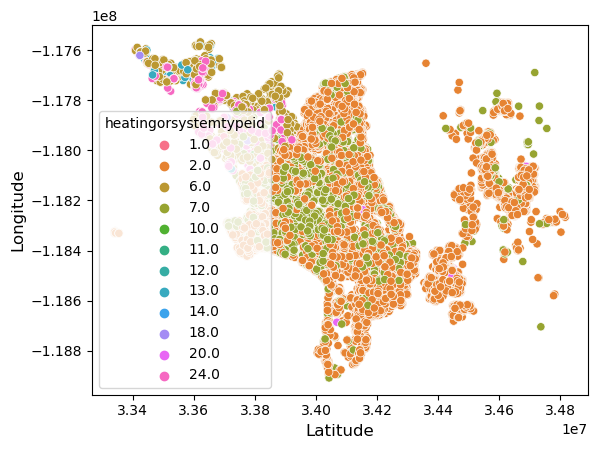

In [60]:
sns.scatterplot(x=X_train.latitude.values, y=X_train.longitude.values, hue=X_train.heatingorsystemtypeid)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Impute **heatingorsystemtypeid** using KNN with latitude and longitude as features.

In [61]:
bf3 = X_train[['latitude', 'longitude', 'heatingorsystemtypeid']]

In [62]:
imputer3 = KNNImputer(n_neighbors=3)

In [63]:
af3 = imputer3.fit_transform(bf3)
X_train[['latitude', 'longitude', 'heatingorsystemtypeid']] = af3

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/4111194154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['latitude', 'longitude', 'heatingorsystemtypeid']] = af3


In [64]:
X_test[['latitude', 'longitude', 'heatingorsystemtypeid']] = imputer3.transform(X_test[['latitude', 'longitude', 'heatingorsystemtypeid']])

/var/folders/jv/24lkdph54q14lprtpmb40sxw0000gn/T/ipykernel_19872/1939532675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['latitude', 'longitude', 'heatingorsystemtypeid']] = imputer3.transform(X_test[['latitude', 'longitude', 'heatingorsystemtypeid']])


<AxesSubplot: xlabel='taxvaluedollarcnt', ylabel='Count'>

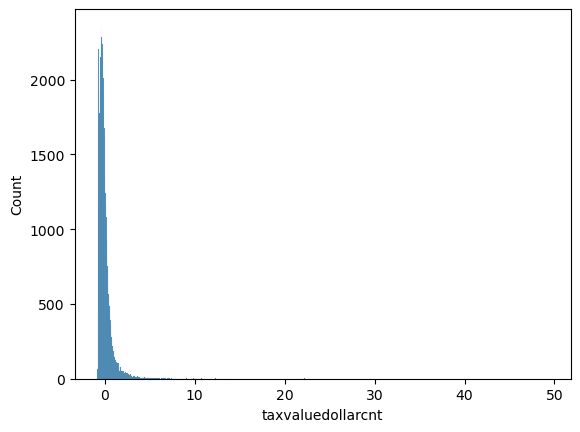

In [65]:
sns.histplot(data=X_train, x="taxvaluedollarcnt") 

Check if there's still missing value.

In [66]:
s = X_train.isnull().sum().sort_values(ascending=False)
s[s > 0]

Series([], dtype: int64)

### Model Selection

#### Random Forest

In [67]:
rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=3, random_state=0) 

In [68]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [69]:
Y_predict_train = rfr.predict(X_train)
Y_predict = rfr.predict(X_test)
print("Random Forest Train MAE: ", mean_absolute_error(Y_train, Y_predict_train))
print("Random Forest Test MAE: ", mean_absolute_error(Y_test, Y_predict))

Random Forest Train MAE:  0.06843132131197778
Random Forest Test MAE:  0.06930213586322341


#### Support Vector Regressor

In [70]:
svr = SVR(kernel = 'rbf', max_iter=300)

In [71]:
svr.fit(X_train, Y_train)

/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVR(max_iter=300)

In [72]:
svr_Y_predict_train = svr.predict(X_train)
print("SVR Train MAE: ", mean_absolute_error(Y_train, svr_Y_predict_train))
svr_Y_predict = svr.predict(X_test)
print("SVR Test MAE: ", mean_absolute_error(Y_test, svr_Y_predict))

SVR Train MAE:  1.9000460983145149
SVR Test MAE:  1.9057368672022885


#### Decision Tree

In [73]:
dt = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=3)

In [74]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [75]:
dt_Y_predict_train = dt.predict(X_train)
print("Decision Tree Train MAE: ", mean_absolute_error(Y_train, dt_Y_predict_train))
dt_Y_predict = dt.predict(X_test)
print("Decision Tree Test MAE: ", mean_absolute_error(Y_test, dt_Y_predict))

Decision Tree Train MAE:  0.06851361503498862
Decision Tree Test MAE:  0.06942912703724216


### Tune Parameters

Random Forest model performs the best among the three. Now tune parameter for Random Forest model to see its best performance.

In [76]:
random_grid = {'n_estimators': [100, 300, 500],
               'max_depth': [3, 7, 10],
               'min_samples_split': [2, 5, 10]}

In [77]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [78]:
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=3, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 7, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=0, verbose=2)

In [396]:
print(f"Random Forest Model Best Parameters: {rf_random.best_params_}")

Random Forest Model Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 3}


In [397]:
rfr.set_params(**rf_random.best_params_)

RandomForestRegressor(max_depth=3, n_estimators=500, random_state=0)

In [398]:
rfr.fit(X_train, Y_train)

[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=  12.5s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=300; total time=  44.0s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=100; total time=  15.3s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=100; total time=  12.5s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=300; total time=  39.3s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END max_depth=3, min_samples_split=10, n_estimators=300; total time=  41.0s
[CV] END max_depth=3, min_samples_split=10, n_estimators=500; total time= 1.2min
[CV] END .max_depth=7, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END .max_depth=7, min_samples_split=5, n_estimators=100; total time=  29.2s
[CV] END .max_depth=7, min_samples_split=5, n_estimators=100; total time=  28.6s
[CV] END .max_depth=7, min_samples_split=5, n_estimators=100; total time=  28.1s
[CV] END .max_depth=7, min_s

RandomForestRegressor(max_depth=3, n_estimators=500, random_state=0)

In [79]:
Y_predict = rfr.predict(X_test)
print("Random Forest Test MAE: ", mean_absolute_error(Y_test, Y_predict))

Random Forest Test MAE:  0.06930213586322341
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=  11.1s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=500; total time=  54.5s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=100; total time=  11.0s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=300; total time=  32.7s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=500; total time=  54.5s
[CV] END max_depth=3, min_samples_split=10, n_estimators=500; total time=  55.0s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=100; total time=  24.5s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=500; total time= 2.1min
[CV] END .max_depth=7, min_samples_split=5, n_estimators=300; total time= 1.3min
[CV] END .max_depth=7, min_samples_split=5, n_estimators=500; total time= 2.1min
[CV] END max_depth=7, min_samples_split=10, n_estimators=300; total time= 1.2min
[CV] END max_depth=7, min_samples_split=10, n_estimators=500; to

### Save Model

In [80]:
with open('zillow.model', 'wb') as f:
    pickle.dump(rfr, f)